In [2]:
# Add matplotlib inline magic command
%matplotlib inline

# Add dependences
import matplotlib.pyplot as plt
import pandas as pd


In [19]:
# Files to load

city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [20]:
# read city data in to a DataFrame
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [142]:
# read ride data in to a DataFrame
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,"Monday, January 14, 2019",13.83,5739410000000
1,South Michelleport,"Monday, March 4, 2019",30.24,2343910000000
2,Port Samanthamouth,"Sunday, February 24, 2019",33.44,2005070000000
3,Rodneyfort,"Sunday, February 10, 2019",23.44,5149250000000
4,South Jack,"Wednesday, March 6, 2019",34.58,3908450000000
5,South Latoya,"Monday, March 11, 2019",9.52,1995000000000
6,New Paulville,"Wednesday, February 27, 2019",43.25,793208000000
7,Simpsonburgh,"Friday, April 26, 2019",35.98,111954000000
8,South Karenland,"Tuesday, January 8, 2019",35.09,7995620000000
9,North Jasmine,"Saturday, March 9, 2019",42.81,5327640000000


In [22]:
# Count the records to find if there are any empty fields
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [23]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [24]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [25]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [26]:
sum(city_data_df["type"]=="Urban")

66

In [27]:
sum(city_data_df["type"]=="Suburban")

36

In [28]:
sum(city_data_df["type"]=="Rural")

18

In [29]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [31]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [33]:
Urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
Suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
Rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]

In [34]:
Urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [35]:
Suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,1/27/2019 3:08,27.79,6.653620e+12,11,Suburban
1626,East Kentstad,4/7/2019 19:44,18.75,6.575960e+12,20,Suburban
1627,Lake Omar,1/17/2019 21:33,21.71,9.669120e+11,22,Suburban
1628,Myersshire,2/27/2019 17:38,17.10,5.706770e+12,19,Suburban
1629,West Hannah,4/19/2019 1:06,37.78,2.273050e+12,12,Suburban


In [36]:
Rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/2019 11:13,43.22,1.076080e+12,9,Rural
2251,North Holly,2/2/2019 14:54,12.42,1.985260e+12,8,Rural
2252,Michaelberg,3/27/2019 18:27,54.85,4.421840e+12,6,Rural
2253,Lake Latoyabury,2/23/2019 21:12,47.90,3.269650e+12,2,Rural
2254,Lake Latoyabury,5/6/2019 8:57,51.80,4.018030e+12,2,Rural


In [38]:
urban_ride_count = Urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [39]:
sub_ride_count = Suburban_cities_df.groupby(["city"]).count()["ride_id"]
sub_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [40]:
rural_ride_count = Rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [41]:
urban_ave_fare = Urban_cities_df.groupby(["city"]).mean()["fare"]
urban_ave_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [42]:
suburban_ave_fare = Suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_ave_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [43]:
rural_ave_fare = Rural_cities_df.groupby(["city"]).mean()["fare"]
rural_ave_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [45]:
urban_driver_count = Urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = Suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = Rural_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12
Barajasview        26
Carriemouth        52
Christopherfurt    41
Deanville          49
Name: driver_count, dtype: int64

Text(42, 35, 'Note: Circle size correlates with driver count per city.')

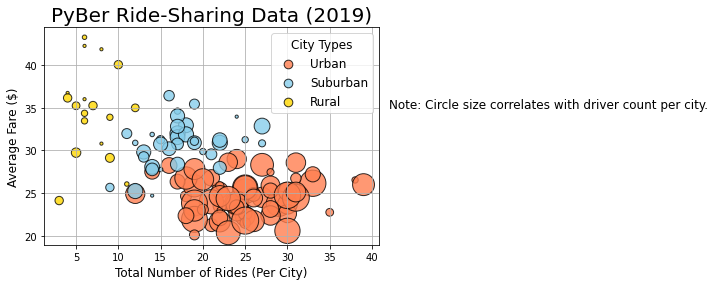

In [53]:
# Build the scatter plots for urban cities
plt.scatter(urban_ride_count, 
            urban_ave_fare,
            s=10*urban_driver_count, c="coral",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban") 

# Build the scatter plots for Suburban cities
plt.scatter(sub_ride_count, 
            suburban_ave_fare,s=10*suburban_driver_count, c="skyblue",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban") 

# Build the scatter plot for Rural cities
plt.scatter(rural_ride_count, rural_ave_fare,
            s=10*rural_driver_count, c="gold",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural") 
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size
plt.text(42,35,"Note: Circle size correlates with driver count per city.",fontsize='12')

In [55]:
# Save file
plt.savefig("analysis/Fig1.png")


<Figure size 432x288 with 0 Axes>

In [57]:
# Get summary statistics of Urban cities
Urban_cities_df.describe()



,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275360e+12,1.000000
50%,37.050000,4.023960e+12,4.000000
75%,47.070000,7.118050e+12,7.000000
max,58.550000,9.990580e+12,9.000000


In [58]:
Suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364250e+12,5.000000
50%,30.750000,5.053220e+12,16.000000
75%,39.830000,7.551670e+12,21.000000
max,49.960000,9.917740e+12,25.000000


In [59]:
Rural_cities_df.describe()


,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275360e+12,1.000000
50%,37.050000,4.023960e+12,4.000000
75%,47.070000,7.118050e+12,7.000000
max,58.550000,9.990580e+12,9.000000


In [60]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [61]:
sub_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [62]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [63]:
urban_ave_fare.describe()

count    66.000000
mean     24.499122
std       2.190653
min      20.093158
25%      22.799102
50%      24.476732
75%      25.965357
max      28.993750
Name: fare, dtype: float64

In [64]:
suburban_ave_fare.describe()

count    36.000000
mean     30.737298
std       2.661333
min      24.704286
25%      29.471291
50%      30.902010
75%      31.983971
max      36.422500
Name: fare, dtype: float64

In [65]:
rural_ave_fare.describe()

count    18.000000
mean     34.637765
std       5.309337
min      24.123333
25%      31.469375
50%      35.121750
75%      36.598750
max      43.278333
Name: fare, dtype: float64

In [66]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(sub_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [67]:
round(urban_ride_count.median(),2), round(sub_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [68]:
urban_ride_count.mode(), sub_ride_count.mode(), rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [70]:
# Import NumPy and the stats module from SciPy
import numpy as np
import scipy.stats as sts


In [72]:
# Calculate the measures of central tendency for the ride count for the urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"the median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"the mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
the median for the ride counts for urban trips is 24.0.
the mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [73]:
# Calculate the measures of central tendency for the ride count for the suburban cities
mean_sub_ride_count = np.mean(sub_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_sub_ride_count:.2f}.")

median_sub_ride_count = np.median(sub_ride_count)
print(f"the median for the ride counts for urban trips is {median_sub_ride_count}.")

mode_sub_ride_count = sts.mode(sub_ride_count)
print(f"the mode for the ride counts for urban trips is {mode_sub_ride_count}.")

The mean for the ride counts for urban trips is 17.36.
the median for the ride counts for urban trips is 17.0.
the mode for the ride counts for urban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [74]:
# Calculate the measures of central tendency for the ride count for the rural cities
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"the median for the ride counts for urban trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"the mode for the ride counts for urban trips is {mode_rural_ride_count}.")

The mean for the ride counts for urban trips is 6.94.
the median for the ride counts for urban trips is 6.0.
the mode for the ride counts for urban trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [86]:
# Get the fares for the urban cities.
urban_fares = Urban_cities_df["fare"]
suburban_fares = Suburban_cities_df["fare"]
rural_fares = Rural_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [90]:
# Calculate the measures of central tendency for teh average fare for the urban cities
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is ${mode_urban_fares}.")


The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5])).


In [91]:
# Calculate the measures of central tendency for the average fare for the suburban cities
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is ${mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is $ModeResult(mode=array([17.99]), count=array([3])).


In [92]:
# Calculate the measures of central tendency for the average fare for the rural cities
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is ${mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is $ModeResult(mode=array([37.05]), count=array([2])).


In [94]:
# Get the driver count data from the different cities
urban_drivers = Urban_cities_df["driver_count"]
suburban_drivers = Suburban_cities_df["driver_count"]
rural_drivers = Rural_cities_df["driver_count"]
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [98]:
# Calculate the measures of central tendency for the average number of drivers for the urban cities
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of drivers for urban trips is {mean_urban_drivers:.0f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median number of drivers for urban trips is {median_urban_drivers}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode number of drivers for urban trips is {mode_urban_drivers}.")


The mean number of drivers for urban trips is 37.
The median number of drivers for urban trips is 37.0.
The mode number of drivers for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [99]:
# Calculate the measures of central tendency for the average number of drivers for the suburban cities
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean number of drivers for suburban trips is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median number of drivers for suburban trips is {mean_suburban_drivers}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode number of drivers for suburban trips is {mean_suburban_drivers}.")


The mean number of drivers for suburban trips is 13.71.
The median number of drivers for suburban trips is 13.712.
The mode number of drivers for suburban trips is 13.712.


In [109]:
# Calculate the measures of central tendency for the average number of drivers for the rural cities
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean number of drivers for rural trips is {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median number of drivers for rural trips is {median_rural_drivers}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode number of drivers for rural trips is {mode_rural_drivers}.")

The mean number of drivers for rural trips is 4.30.
The median number of drivers for rural trips is 4.0.
The mode number of drivers for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


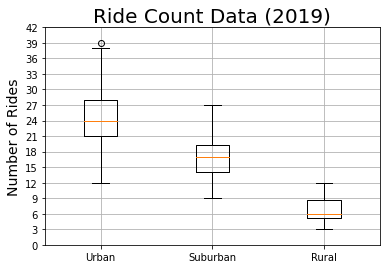

In [130]:
# Create a box and whisker plot for the urban cities ride count.
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count,sub_ride_count, rural_ride_count]
fig, ax=plt.subplots()
ax.boxplot(ride_count_data, labels=x_labels)
# Add the title, y-axis label and grid
ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Rides", fontsize=14)
ax.set_yticks(np.arange(0,45,step=3.0))
ax.grid()
plt.savefig("analysis/Ride Count Data.png")

In [104]:
# Get the city that matches 39
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


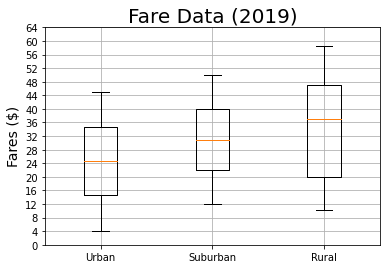

In [131]:
# Create a box and whisker plot for the fare data.
x_labels = ["Urban", "Suburban", "Rural"]
fare_data = [urban_fares,suburban_fares, rural_fares]
fig, ax=plt.subplots()
ax.boxplot(fare_data, labels=x_labels)
# Add the title, y-axis label and grid
ax.set_title("Fare Data (2019)", fontsize=20)
ax.set_ylabel("Fares ($)", fontsize=14)
ax.set_yticks(np.arange(0,65,step=4.0))
ax.grid()
urban_fares.describe()
plt.savefig("analysis/Fare Data.png")



In [127]:
suburban_fares.describe()

count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [128]:
rural_fares.describe()

count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

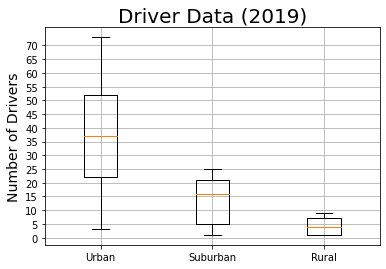

In [132]:
# Create a box and whisker plot for the driver data.
x_labels = ["Urban", "Suburban", "Rural"]
driver_data = [urban_drivers,suburban_drivers, rural_drivers]
fig, ax=plt.subplots()
ax.boxplot(driver_data, labels=x_labels)
# Add the title, y-axis label and grid
ax.set_title("Driver Data (2019)", fontsize=20)
ax.set_ylabel("Number of Drivers", fontsize=14)
ax.set_yticks(np.arange(0,75,step=5.0))
ax.grid()
plt.savefig("analysis/Driver Data.png")

In [133]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [135]:
# Sum of the total fares for ALL cities
total_fares = pyber_data_df['fare'].sum()
total_fares

63538.64

In [136]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()['fare'] / pyber_data_df['fare'].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

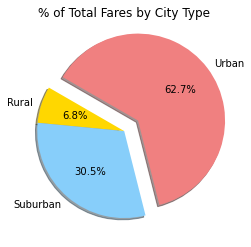

In [141]:
# Import mpl to change the plot configurations using rcParams
import matplotlib as mpl
# Build pie chart of fares by city type
explode_values = [0,0,0.2]
plt.pie(type_percents, 
        explode=explode_values, 
        labels=["Rural","Suburban","Urban"],
        colors=['gold','lightskyblue','lightcoral'],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save file
plt.savefig('analysis/pie chart.png')

In [145]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()['ride_id'] / pyber_data_df['ride_id'].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

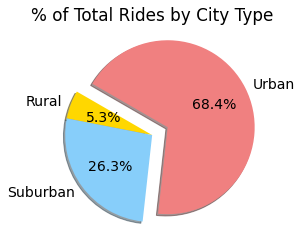

In [146]:
# Build pie chart of rides by city type
explode_values = [0,0,0.2]
plt.pie(ride_percents, 
        explode=explode_values, 
        labels=["Rural","Suburban","Urban"],
        colors=['gold','lightskyblue','lightcoral'],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save file
plt.savefig("analysis/Rides Pie Chart.png")

In [147]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100 * pyber_data_df.groupby(["type"]).sum()['driver_count'] / pyber_data_df['driver_count'].sum()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

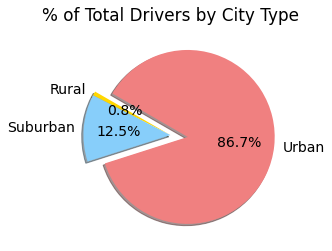

In [148]:
# Build pie chart of drivers by city type
explode_values = [0,0,0.2]
plt.pie(driver_percents, 
        explode=explode_values, 
        labels=["Rural","Suburban","Urban"],
        colors=['gold','lightskyblue','lightcoral'],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save file
plt.savefig("analysis/Drivers Pie Chart.png")